In [3]:
import os
os.getcwd()

'C:\\Users\\Tristan\\anaconda_projects\\4500d95d-32be-4ea6-bd30-ea80726f0dfb'

In [4]:
os.chdir(r'C:\Users\Tristan\Documents\sales-analysis')


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

invoices = pd.read_csv('invoices.csv')
customers = pd.read_csv('customers.json')

invoices.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


### 1. How many unique customers are in the dataset?

In [10]:
num_customers = invoices['customer_id'].nunique()
print(f"There are {num_customers} unique customers.")

There are 5191 unique customers.


### 2. What are the different categories of products available? How many unique categories are there?

In [9]:
unique_categories = invoices['category'].unique()
num_categories = invoices['category'].nunique()
print(f"There are {num_categories} unique product categories:")
print(unique_categories)

There are 8 unique product categories:
['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


### 3. Which payment method is the most popular? How many times was it used?

In [13]:
payment_counts = invoices['payment_method'].value_counts()
most_popular_payment = payment_counts.idxmax()
usage_count = payment_counts.max()
print(f"The most popular payment method is {most_popular_payment} and was used {usage_count} times.")

The most popular payment method is Cash and was used 44447 times.


### 4. What are the three most popular categories, by total sales?

In [15]:
invoices['total'] = invoices['price'] * invoices['quantity']
category_sales = invoices.groupby('category')['total'].sum()
top_3 = category_sales.sort_values(ascending=False).head(3)
formatted = [f"{cat} (₱{amt:,.2f})" for cat, amt in top_3.items()]
sentence = ", ".join(formatted[:-1]) + f", and {formatted[-1]}"
print(f"The three most popular product categories based on total sales are {sentence}.")

The three most popular product categories based on total sales are Clothing (₱113,996,791.04), Shoes (₱66,553,451.47), and Technology (₱57,862,350.00).


### 5. What are the total sales attributed to customers over the age of 45?

In [34]:
invoices = pd.read_csv("invoices.csv")
customers = pd.read_json("customers.json")

In [35]:
print(customers.columns)


Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [37]:
customers.rename(columns={'id': 'customer_id'}, inplace=True)
invoices['total'] = invoices['price'] * invoices['quantity']
merged_df = pd.merge(invoices, customers, on='customer_id')
over_45 = merged_df[merged_df['age'] > 45]
total_sales_over_45 = over_45['total'].sum()
print(f"The total sales attributed to customers over the age of 45 is ₱{total_sales_over_45:,.2f}.")


The total sales attributed to customers over the age of 45 is ₱82,039,768.15.


### 6. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

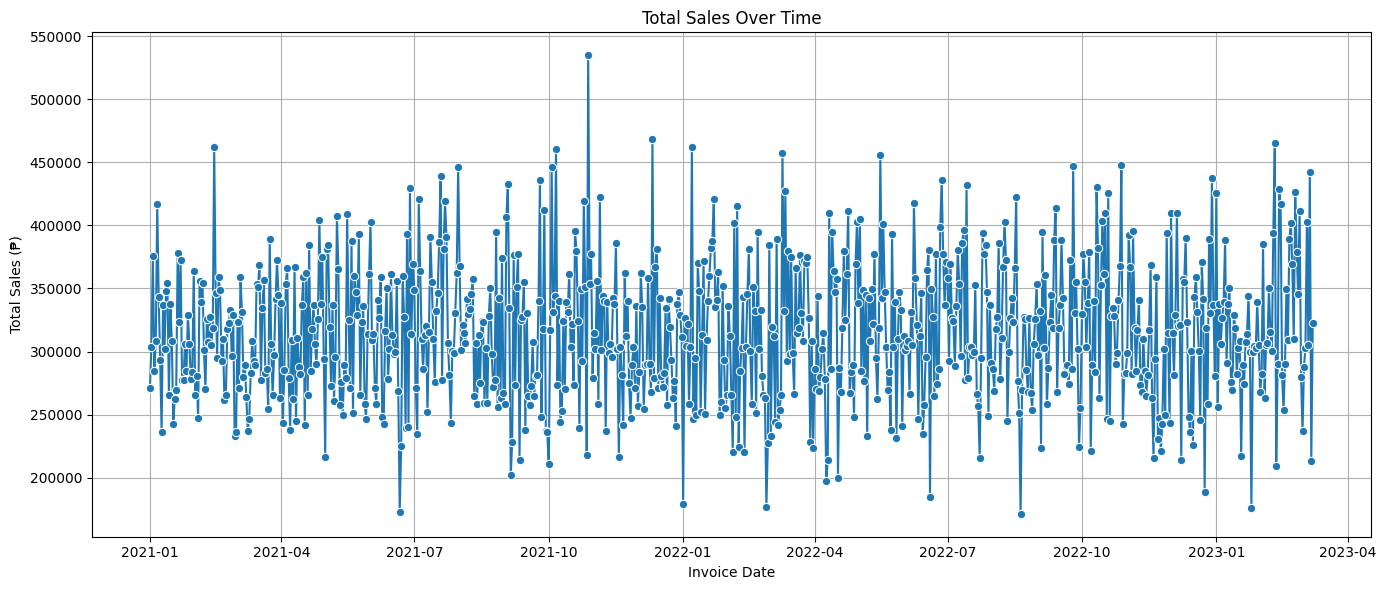

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True, errors='coerce')
invoices = invoices.dropna(subset=['invoice_date'])
invoices['total'] = invoices['price'] * invoices['quantity']
daily_sales = invoices.groupby('invoice_date')['total'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_sales, x='invoice_date', y='total', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales (₱)')
plt.grid(True)
plt.tight_layout()
plt.show()

### The graph above illustrates the fluctuation of daily total sales between early 2021 and early 2023. While sales remain consistent throughout the period, there are noticeable spikes in total sales during the months of November and December in both 2021 and 2022. These increases are maybe caused by seasonal shopping behavior likely associated with year-end holidays, such as Black Friday, Christmas, and New Year. Also, there is a noticeable dip in sales during January and February, which is consistent with post-holiday spending slowdowns. Overall, while the day-to-day data appears highly variable, a seasonal pattern of increased sales in the fourth quarter followed by slower activity in the first quarter is clearly visible.

### 7. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [49]:
merged_df = pd.merge(invoices, customers, on='customer_id')
merged_df['age'] = merged_df['age'].fillna(merged_df['age'].median())
merged_df['age_group'] = (
    (merged_df['age'] // 10 * 10).astype(int).astype(str)
    + '-' +
    ((merged_df['age'] // 10 * 10 + 9).astype(int).astype(str))
)
pivot_table = merged_df.pivot_table(
    index='category',
    columns='age_group',
    values='total',
    aggfunc='sum',
    fill_value=0
)
pivot_table

age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,421215.45,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,57218954.32,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,3442397.58,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,435428.88,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,33493687.19,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,332052.84,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,29820000.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,1978117.12,345067.52,363955.20,273244.16,153932.80
